In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# mRNA RPKM drawing

In [2]:
data = pd.DataFrame.from_csv('C:/Users/pengye/desktop/4ploting/rRNA/RPKM/12sample.1e-8.species.mRNAabundance', sep='\t')
# data = pd.DataFrame.from_csv('RPKM/abundance/12sample.1e-8.species.mRNAabundance', sep='\t')

In [3]:
trimed_data = data.drop(data.columns[4:8], axis=1, inplace=False)

In [4]:
# smpl_name = ['JJ-C', 'JJ-1', 'JJ-2', 'JJ-3', 'FC-C', 'FC-1', 'FC-2', 'FC-3', 'PY-C', 'PY-1', 'PY-2', 'PY-3']
smpl_name = ['S1-C', 'S1-1', 'S1-2', 'S1-3', 'S2-C', 'S2-1', 'S2-2', 'S2-3', 'S3-C', 'S3-1', 'S3-2', 'S3-3']

trimed_data.columns = smpl_name

In [85]:
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.minorticks_off()
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
def setTicks(ax):
    plt.setp(ax,
             xticks=np.logspace(-2, 6, num=9),
             xticklabels=range(-2, 7),
             yticks=np.logspace(-2, 6, num=9),
             yticklabels=range(-2, 7))
    ax.tick_params(axis='both', which='major', labelsize=25)

def pearsonText(ax, cor):
    ax.text(0.215, 0.95,
            'Pearson\'s r: %.3f' % cor,
            ha='center', va='center',
            transform=ax.transAxes,
            bbox={'facecolor':'gainsboro', 'alpha':0.2, 'pad':10},
            fontsize=27)

#def 

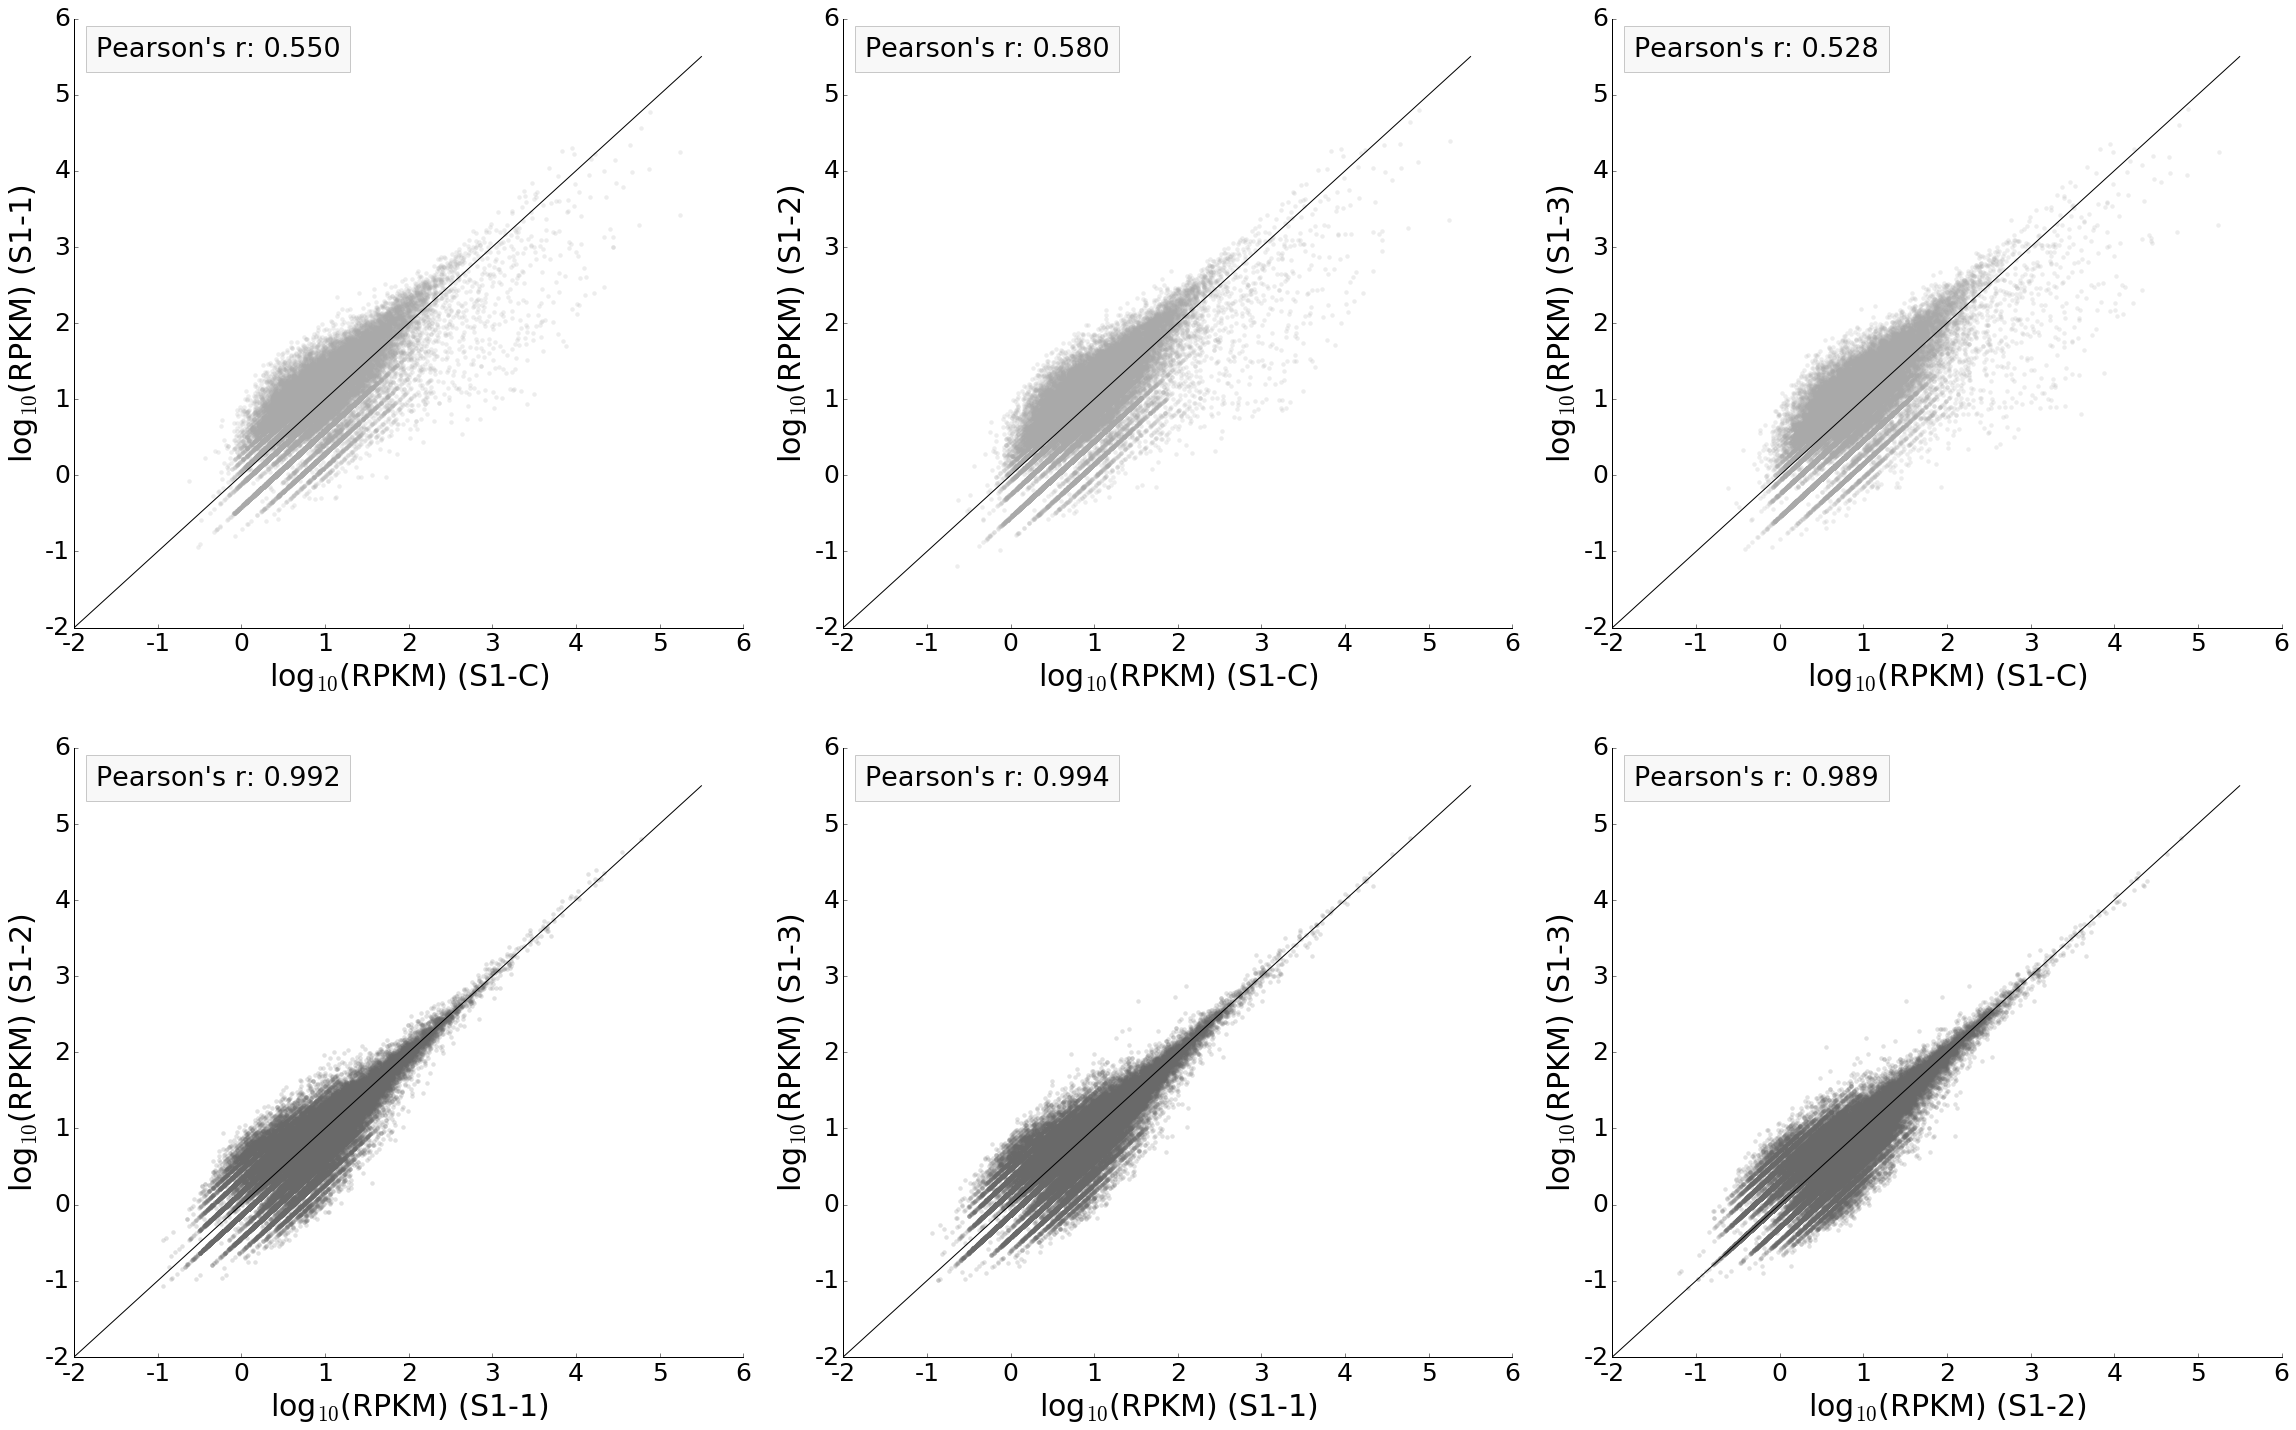

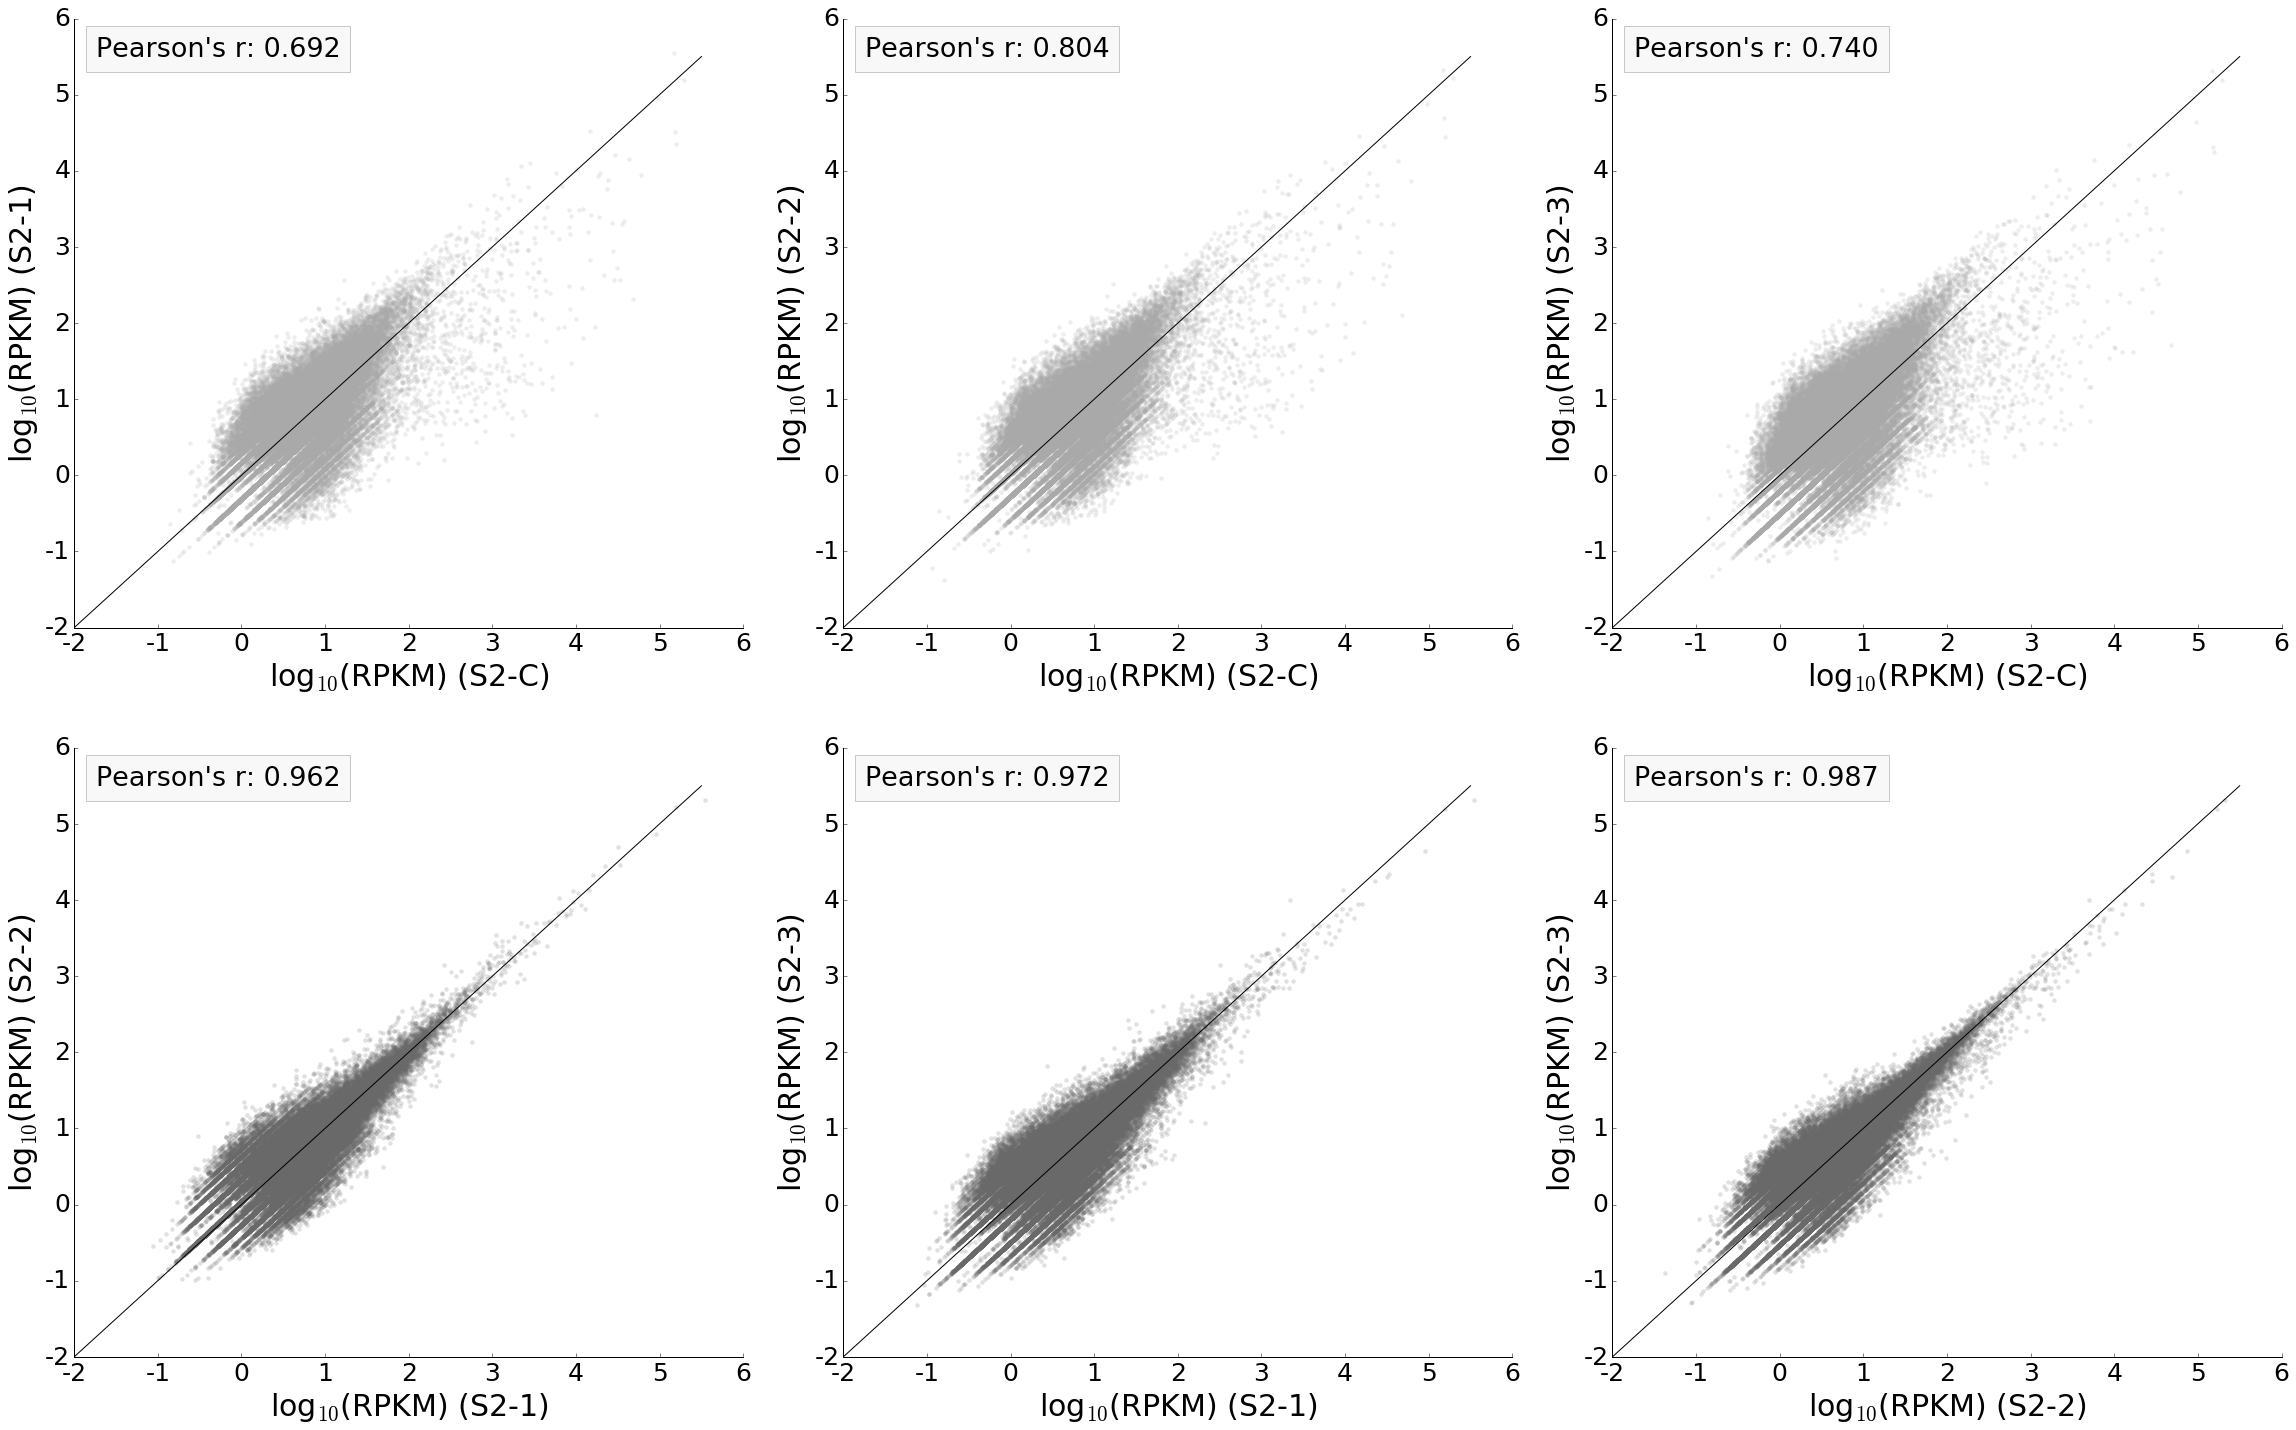

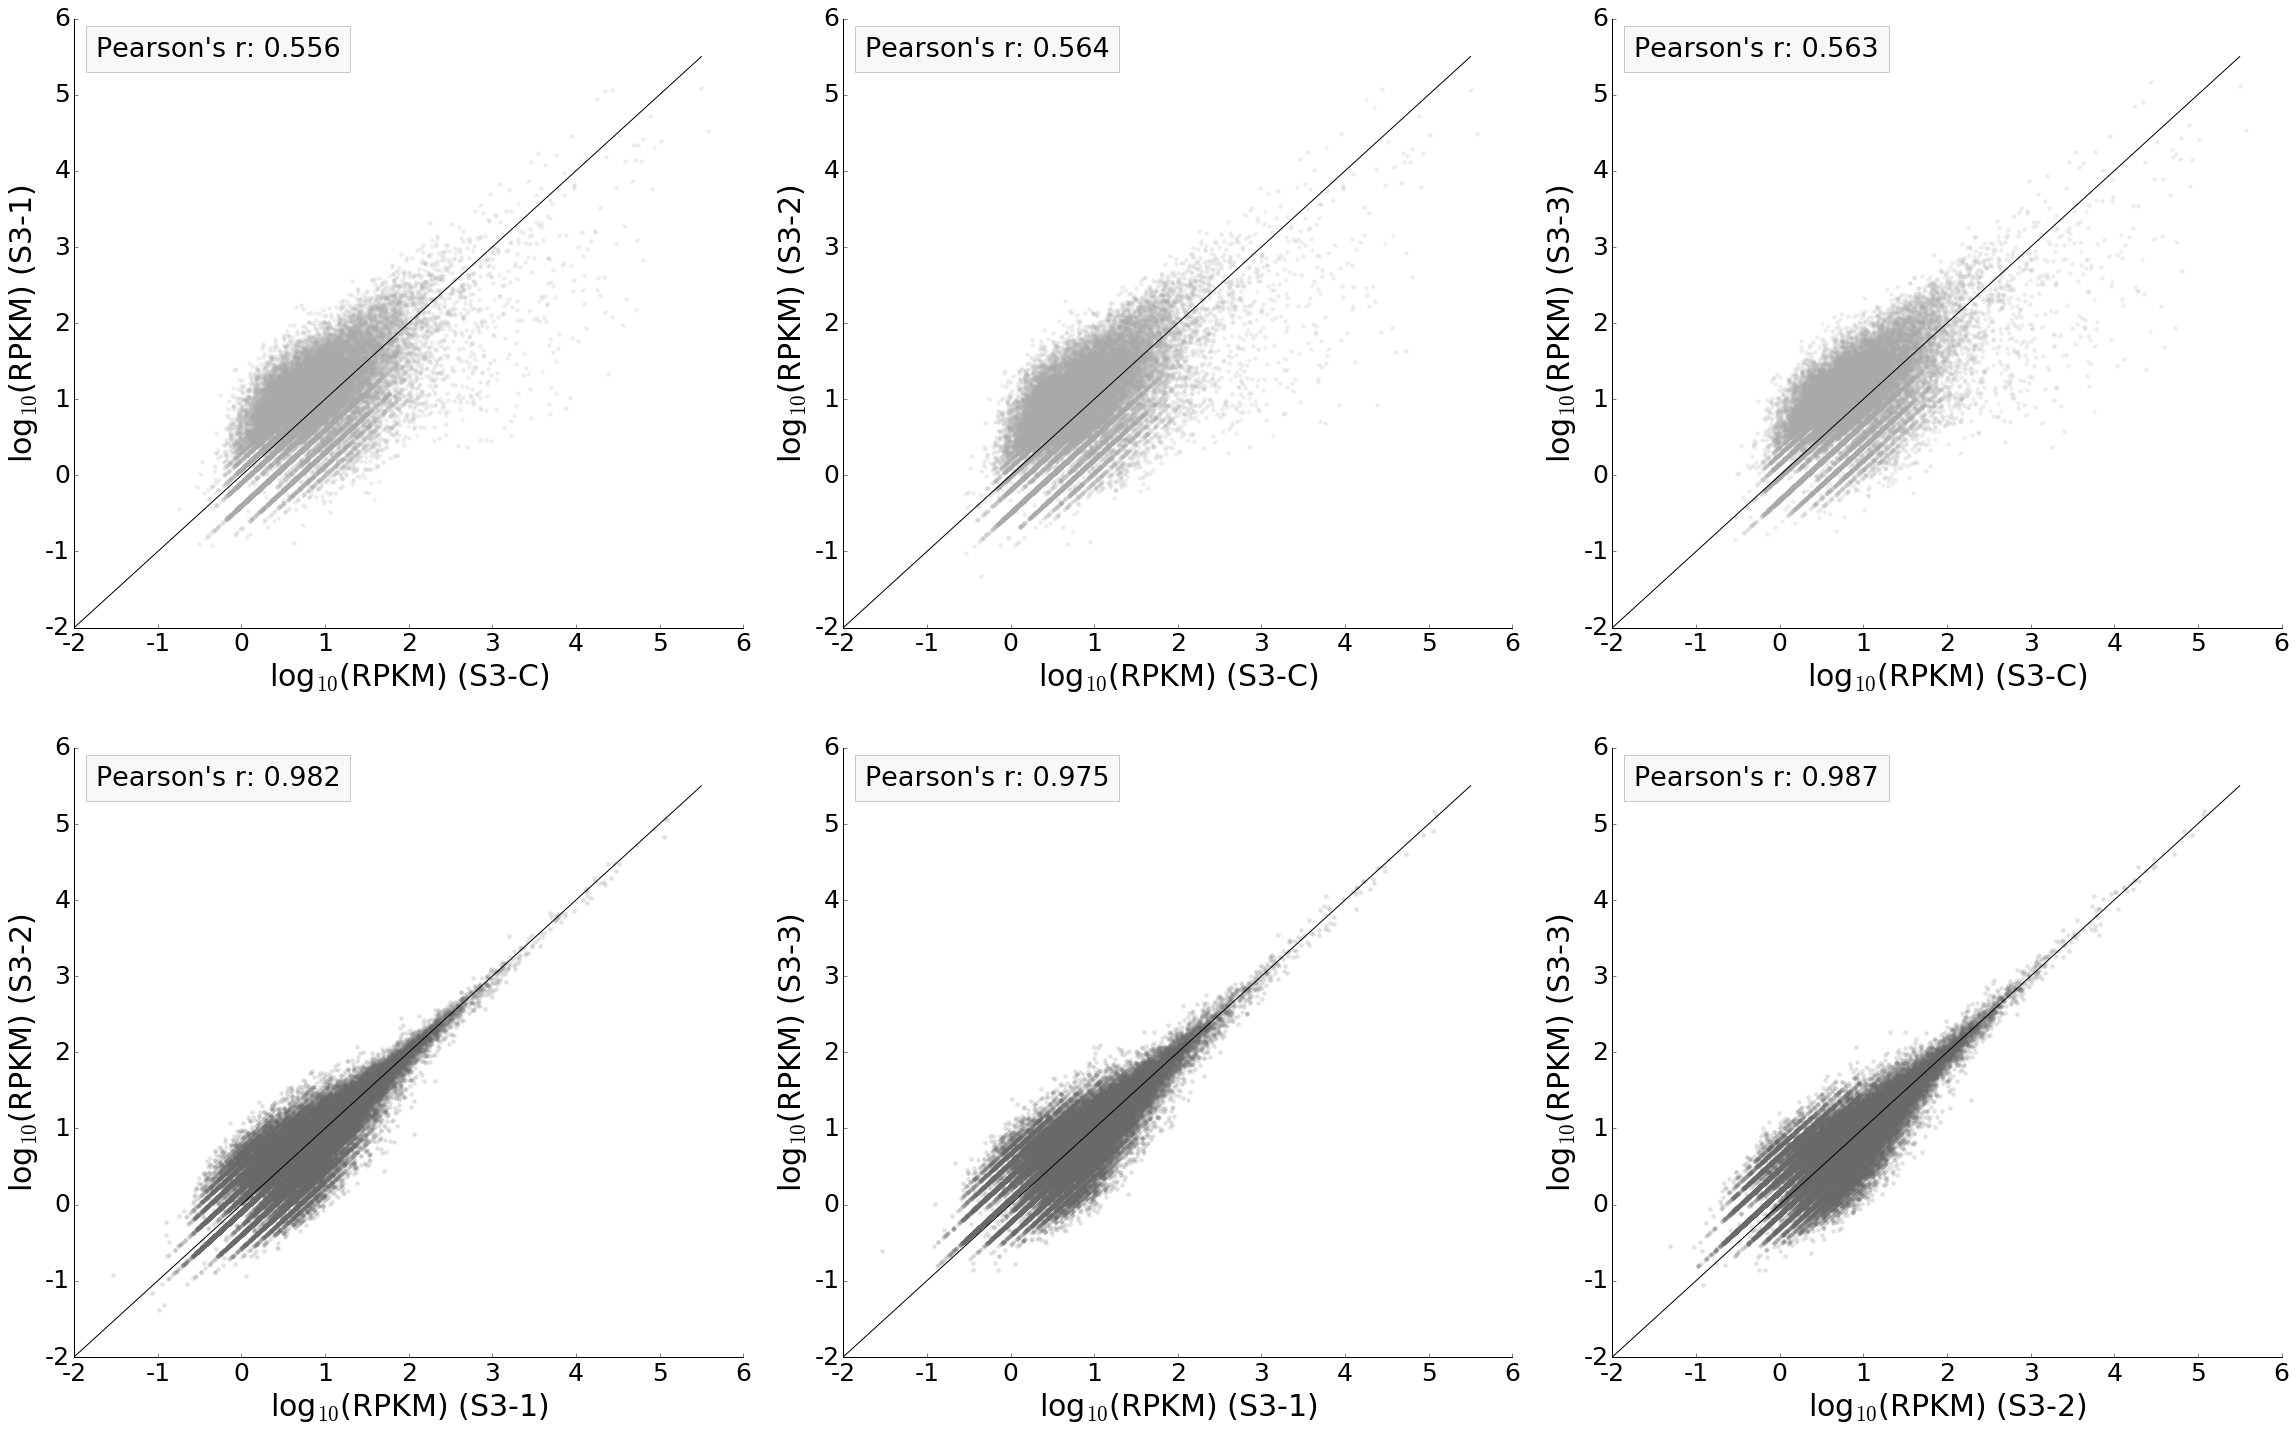

In [86]:
%matplotlib inline

def drawRPKM(smpl):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(32, 20))
    fig.patch.set_facecolor('white')
    for i in range(1, 4):
        base = smpl
        j = i + base
        x = trimed_data.ix[:, base]
        y = trimed_data.ix[:, j]
        ax = axes[0, i-1]
    
        cor = x.corr(y)    
        pearsonText(ax, cor)

        ax.scatter(x, y, alpha=.2, c='darkgray', linewidth=0.0)

        # ax.set_title('%s vs %s' % (smpl_name[j], smpl_name[base]), fontsize=35)
        ax.set_xlabel('log$_{10}$(RPKM) (%s)' % smpl_name[base], fontsize=30)   # use {} to include '1' and '0' as a whole
        ax.set_ylabel('log$_{10}$(RPKM) (%s)' % smpl_name[j], fontsize=30)

        ax.set_xlim((1e-2, 1e6))
        ax.set_ylim((1e-2, 1e6))

        ax.set_xscale('log')
        ax.set_yscale('log')

        ax.plot((1e-2, 10**5.5), (1e-2, 10**5.5), c='k')

        setTicks(ax)
        simpleaxis(ax)

    for m, pair in enumerate(zip([1, 1, 2], [2, 3, 3])):
        base = smpl
        xloc = pair[0] + base
        yloc = pair[1] + base
        x = trimed_data.ix[:, xloc]
        y = trimed_data.ix[:, yloc]
        ax = axes[1, m]

        cor = x.corr(y)
        pearsonText(ax, cor)

        ax.scatter(x, y, alpha=.2, c='dimgray', linewidth=0.0)

        # ax.set_title('%s vs %s' % (smpl_name[yloc], smpl_name[xloc]), fontsize=35)
        ax.set_xlabel('log$_{10}$(RPKM) (%s)' % smpl_name[xloc], fontsize=30)
        ax.set_ylabel('log$_{10}$(RPKM) (%s)' % smpl_name[yloc], fontsize=30)

        ax.set_xlim((1e-2, 1e6))
        ax.set_ylim((1e-2, 1e6))

        ax.set_xscale('log')
        ax.set_yscale('log')

        ax.plot((1e-2, 10**5.5), (1e-2, 10**5.5), c='k')

        setTicks(ax)
        simpleaxis(ax)

    plt.tight_layout(w_pad=2.5, h_pad=4.0)
    plt.show()
    
smpls = [0, 4, 8]
for sp in smpls:
    drawRPKM(sp)

# rRNA soap drawing

In [93]:
import os, fnmatch

In [89]:
# files_path = r'C:\Users\pengye\Desktop\4ploting\rRNA\rRNA_soap\soap_details'
files_path = r'C:\Users\pengye\Desktop\4ploting\rRNA\rRNA_soap\soap_details'

In [94]:
# cp from http://stackoverflow.com/questions/1724693/find-a-file-in-python
def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

In [96]:
all_files = find('*', files_path)

In [108]:
no_depth = [x for x in all_files if 'depth' not in x and 'soapout.list' not in x]
tmp_files = [x for x in no_depth if 'temp' in x]

# just don't wanna use SET, stupid? let it be.
modify_and_raw_files = [x for x in no_depth if x not in tmp_files]
modified_files = [x for x in modify_and_raw_files if 'modify' in x]
raw_files = [x for x in modify_and_raw_files if x not in modified_files]

In [240]:
def makeDF(file_list):
    whole_df = pd.DataFrame()
    for file_ in file_list:
        name = '_'.join(os.path.basename(file_).split('.')[:-2])
        
        with open(file_) as f:
            each_list = []
            tmp_list = [x.strip() for x in f.readlines()]

            for line in tmp_list:
                line = line.split(' ')
                if '>' in line[0]:
                    line = line[1:]
                line = [float(x) for x in line]
                each_list.extend(line)
        
        whole_df[name] = each_list
    
    return whole_df

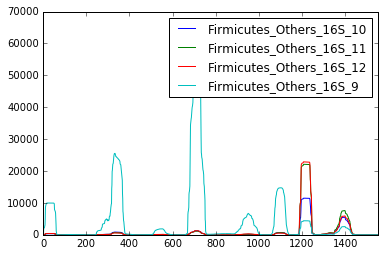

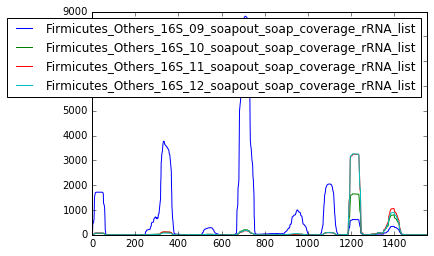

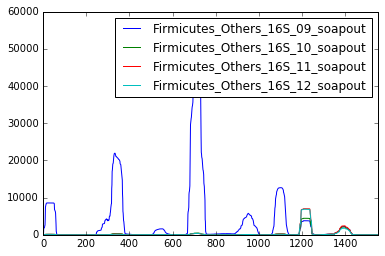

In [250]:
# raw
f_o_16s_files = [x for x in raw_files if 'Firmicutes_Others' in x and '16S' in x]
s1_f_o_16s_files = [x for x in f_o_16s_files if x.split(r'/')[-1].split('.')[1].split('_')[-1] in ['9', '10', '11', '12']]
s1_f_o_16s_df = makeDF(s1_f_o_16s_files)
s1_f_o_16s_df.plot()

# tmp
f_o_16s_files = [x for x in tmp_files if 'Firmicutes_Others' in x and '16S' in x]
s1_f_o_16s_files = [x for x in f_o_16s_files if x.split(r'/')[-1].split('.')[1].split('_')[-1] in ['09', '10', '11', '12']]
s1_f_o_16s_df = makeDF(s1_f_o_16s_files)
s1_f_o_16s_df.plot()

# modified
f_o_16s_files = [x for x in modified_files if 'Firmicutes_Others' in x and '16S' in x]
s1_f_o_16s_files = [x for x in f_o_16s_files if x.split(r'/')[-1].split('.')[1].split('_')[-1] in ['09', '10', '11', '12']]
s1_f_o_16s_df = makeDF(s1_f_o_16s_files)
s1_f_o_16s_df.plot()

In [259]:
s1_f_o_16s_df.mean()

Firmicutes_Others_16S_09_soapout    3650.441714
Firmicutes_Others_16S_10_soapout     262.421100
Firmicutes_Others_16S_11_soapout     345.831453
Firmicutes_Others_16S_12_soapout     317.796572
dtype: float64

# Species soap drawing

In [ ]:
import os, fnmatch

In [247]:
# files_path = r'C:\Users\pengye\Desktop\4ploting\rRNA\rRNA_soap\species_depth'
files_path = r'C:\Users\pengye\Desktop\4ploting\rRNA\rRNA_soap\species_depth'

In [249]:
# cp from http://stackoverflow.com/questions/1724693/find-a-file-in-python
all_files = find('*', files_path)

In [252]:
# the logic of grouping here differs from that one in rRNA soap drawing
list_of_16s_files = [x for x in all_files if '16S' in x]
list_of_23s_files = [x for x in all_files if '23S' in x]

In [257]:
all_modified_16S = makeDF(list_of_16s_files)

160